In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, PReLU, ELU, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score

In [40]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
x = df.iloc[:,3:13]
y = df.iloc[:,13]
geography = pd.get_dummies(x['Geography'],drop_first=True)
gender = pd.get_dummies(x['Gender'],drop_first=True)
x = pd.concat([x,geography,gender],axis=1)
x = x.drop(['Geography','Gender'],axis=1)
x.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [43]:
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
print(x_train)
print(x_test)
x_train.shape

[[ 0.16958176 -0.46460796  0.00666099 ... -0.5698444   1.74309049
  -1.09168714]
 [-2.30455945  0.30102557 -1.37744033 ...  1.75486502 -0.57369368
   0.91601335]
 [-1.19119591 -0.94312892 -1.031415   ... -0.5698444  -0.57369368
  -1.09168714]
 ...
 [ 0.9015152  -0.36890377  0.00666099 ... -0.5698444  -0.57369368
   0.91601335]
 [-0.62420521 -0.08179119  1.39076231 ... -0.5698444   1.74309049
  -1.09168714]
 [-0.28401079  0.87525072 -1.37744033 ...  1.75486502 -0.57369368
  -1.09168714]]
[[-0.55204276 -0.36890377  1.04473698 ...  1.75486502 -0.57369368
  -1.09168714]
 [-1.31490297  0.10961719 -1.031415   ... -0.5698444  -0.57369368
  -1.09168714]
 [ 0.57162971  0.30102557  1.04473698 ... -0.5698444   1.74309049
  -1.09168714]
 ...
 [-0.74791227 -0.27319958 -1.37744033 ... -0.5698444   1.74309049
   0.91601335]
 [-0.00566991 -0.46460796 -0.33936434 ...  1.75486502 -0.57369368
   0.91601335]
 [-0.79945688 -0.84742473  1.04473698 ...  1.75486502 -0.57369368
   0.91601335]]


(8000, 11)

# Lets make the ANN

In [44]:
classifier = Sequential()
# Adding the input layer and the first hiddne layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))

# Adding the 2nd hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

# fitting the ANN to training set
model_history = classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5551 - accuracy: 0.7352 - val_loss: 0.4962 - val_accuracy: 0.7785
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4825 - accuracy: 0.7897 - val_loss: 0.4760 - val_accuracy: 0.7921
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4655 - accuracy: 0.7968 - val_loss: 0.4642 - val_accuracy: 0.7978
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4538 - accuracy: 0.8005 - val_loss: 0.4559 - val_accuracy: 0.8016
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4449 - accuracy: 0.8046 - val_loss: 0.4495 - val_accuracy: 0.8020
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4373 - accuracy: 0.8084 - val_loss: 0.4439 - val_accuracy: 0.8012
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4303 - accuracy: 0.8119 - val_loss: 0.4387 - val_accuracy: 0.8058

Epoch 58/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3492 - accuracy: 0.8543 - val_loss: 0.3721 - val_accuracy: 0.8440
Epoch 59/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3487 - accuracy: 0.8541 - val_loss: 0.3716 - val_accuracy: 0.8429
Epoch 60/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3481 - accuracy: 0.8550 - val_loss: 0.3713 - val_accuracy: 0.8440
Epoch 61/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3474 - accuracy: 0.8548 - val_loss: 0.3710 - val_accuracy: 0.8440
Epoch 62/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3469 - accuracy: 0.8543 - val_loss: 0.3706 - val_accuracy: 0.8444
Epoch 63/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3465 - accuracy: 0.8558 - val_loss: 0.3702 - val_accuracy: 0.8455
Epoch 64/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3458 - accuracy: 0.8567 - val_loss: 0.3698 - val_accuracy:

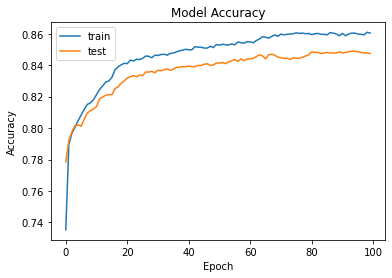

In [47]:
# List all data in history
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['train','test'],loc='upper left')
plt.show()

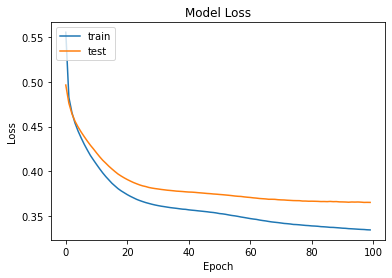

In [48]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','test'],loc='upper left')
plt.show()

# Making the predictions and evaluating the model

In [49]:
# Predicting the test set resuls
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [50]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1502,   93],
       [ 193,  212]], dtype=int64)

In [52]:
score=accuracy_score(y_test,y_pred)
score

0.857